# Week 12: Text Analysis at Two Scales

![PL](https://www.dickinson.edu/images/milton_photo_PS.jpg)

### Instructions for Submitting

Please follow the format below when typing your names in the notebook. This is **mandatory** for all group submissions.
**Each group** will turn in a notebook. Note that this is different from the first ICA. You will still work together, but you will come up with your own answers.

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**
- Separate each member's name with a **semicolon (;)**
- Do **not** include any extra text or formatting.
- **Delete this instruction text** and replace it with your names.

#### Example:
    Doe, Jane Marie; Smith, John Alan; Lee, Anna Grace;

⚠️ **Failure to follow this format will result in a reduction of your grade.**

Put your names in the next markdown cell




Belieu, Joshua, Alan; Nicholson, Joshua, David; Akgun, Batu; Labombard, Ethan, Joseph;

Richards, Ethan, Cooper; Ousmanov, Dennis, Phillip;


_Names_

## ICA Structure
Groups work in pairs: {1,2}, {3,4}, etc.
Time management crucial - aim to start presentations at 9:30

## Dataset
Milton's *Paradise Lost* from NLTK Gutenberg corpus

## Group Assignments

### Odd-Numbered Groups: Document-Level Analysis
Focus on macro patterns:
- Overall text structure
- Thematic elements
- Stylistic features
- Global word distributions

### Even-Numbered Groups: Pattern-Level Analysis
Focus on micro patterns:
- Word pairs and sequences
- Local language structures
- Phrase repetitions 
- Contextual relationships

## Final Presentations (20 minutes)
Each paired group teaches the other:
- Odd groups: How large-scale patterns inform AI understanding
- Even groups: How local patterns affect AI processing
- Compare insights from both scales of analysis
- Discuss implications for modern language models
- Either draw detailed plots on the whiteboards or use the small monitors 

## Success Metrics
- Complete analysis pipeline
- Prepare clear presentation
- Engage in cross-group learning
- Connect findings to AI applications

*Note: Time management is crucial for completing the final discussion phase.*


_____

# Both Groups: ICA Text as Data

In this ICA you will present your findings to one of the other groups using the usual pattern: $\{1,2\}$, $\{3,4\}$, and so on. If there is an odd number of groups and you can't pair, work with the smallest groups when you present. 

It is more important that you finish to the end than completing all steps so that you can complete the final discussion. I recommend assigning someone you trust to keep track of time so that you can start your presentations at 9:30. 

Both groups will begin with Milton's _Paradise Lost_, but odd groups will focus on document-level analyses whereas the even numbered groups will focus on small-scale pattern analyses. You will then compare what both groups learned from the data by comparing these two data science strategies. 

Run this code and be sure everyone in your group understands it. Add comments to the confusing parts. For example, why is `books = text.split('BOOK')` used? 

In [24]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# good viz
sns.set_theme()
sns.set_palette("husl")

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('gutenberg')

# Load Paradise Lost
from nltk.corpus import gutenberg
text = gutenberg.raw('milton-paradise.txt')

# Preprocessing functions
def preprocess_text(text):
    """Clean and tokenize text"""
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and len(token) > 1 
             and token not in stop_words]
    return tokens

def split_into_books(text):
    """Split Paradise Lost into individual books"""
    books = text.split('BOOK')
    books = [book.strip() for book in books if len(book.strip()) > 100]
    return books

books = split_into_books(text)

[nltk_data] Downloading package punkt to /home/jabelieu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jabelieu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jabelieu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/jabelieu/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


![TF_IDF](https://dquigley.dev/assets/sentiment_pl/vis_sent_nrc.png)
_____

# **Odd-Numbered Groups:** TF-IDF: Term Frequency-Inverse Document Frequency

Your group will explore properties of the dataset at the document level. You will learn, explore and teach TF-IDF. Assign someone to run your whiteboarrd as you work so that you have your lecture ready for the even-numbered group you are paired with. 

To truly understand any document we need to compare to _other_ documents. Why? In the PCA you obtained statistics on the letters and words, but without removing "trivial" words that occur in all datasets. Just because "the" appears frequently doesn't tell us much about the document!  We would like to find the important words in our document that _do not_ appear in other documents. One approach to determing what is unique about a document is with TF-IDF. 

All of the code is given. Your task is to discuss it with your group, understand the concepts and be able to explain the plots to the other group. Summarize all of this on your whiteboard to present to your paired group. 

### What is TF-IDF?
TF-IDF is a numerical measure that answers the question: "How important is this word to a document within a collection of documents?" It combines two pieces of information:
- How often a word appears in a document (TF)
- How unique that word is across all documents (IDF)

For example: in Milton's Paradise Lost there are 12 books: _we want to know what each book is about_. This could be used to determine the plot structure, the flow of the tone/sentiment and so on. Let's walk through both of these to see how each works. 

#### Term Frequency (TF)
Term Frequency measures how often a word appears in a document. Here is some simple example Python to illustrate this.

```python
# Simple example
document = "Data science is fun. Data analysis helps us understand patterns."
term = "data"
tf = document.lower().count(term)  # tf = 2
```

The more times a word appears in a document, the more important it might be. But there's a problem: common words like "the" or "is" would always seem important! That's where IDF comes in - try it!

#### Inverse Document Frequency (IDF)
IDF measures how unique or rare a word is across all documents.

```python
import math

total_documents = 100
documents_with_term = 5
idf = math.log(total_documents / documents_with_term) # this is the definition of IDF
```

You'll want to show this equation to the other group and be able to explain its behavior. For example, if there are words like "the", probably very common to all documents, is the IDF large? Small? $\infty$? $0$? $\pi$? 

If a word appears in:
- Many documents $\rightarrow$ ??? IDF (??? distinctive)
- Few documents $\rightarrow$ ??? IDF (??? distinctive)

#### Putting Them Together
TF-IDF = TF $\times$ IDF

Example:
- Word "the" might have:
  - High TF (appears often)
  - Low IDF (appears in all documents)
  - Result: Low TF-IDF

- Word "heaven" might have:
  - Moderate TF
  - High IDF (appears in specific documents)
  - Result: High TF-IDF


____

#### Understanding TF-IDF Notation

Let's be very clear on how we use this by making the notation more precise.

For a term $t$ in document $i$ within corpus $D$:

$$(TF\text{-}IDF)_{i,t} = TF_{i,t} \cdot IDF_t$$

where:
- $TF_{i,t}$ is the term frequency of $t$ in document $i$
- $IDF_t = \log\frac{|D|}{|\{d \in D: t \in d\}|}$

Note that $TF$ is calculated per-document while $IDF$ requires information from the entire corpus $D$. Sometimes you see the term "TF-IDF matrix" and you can see why that term is useful.

This distinction is crucial when processing new documents or updating term weights in a system.

____


### Why Is TF-IDF Useful?
1. **Document Comparison**: Find similar documents based on important terms
2. **Key Term Extraction**: Identify distinctive words in each document
3. **Search Relevance**: Rank documents based on query terms
4. **Text Classification**: Convert text into meaningful numerical features

### In Paradise Lost
When analyzing Paradise Lost, TF-IDF helps us:
- Find distinctive themes in each book
- Track how language changes across the narrative
- Identify which terms are truly significant vs. just common

______

### Document Scale in TF-IDF Analysis

#### What Counts as a "Document"?
TF-IDF is scale-independent - a "document" can be:
- Entire books (like comparing Paradise Lost vs. Hamlet)
- Chapters within a book (our Paradise Lost analysis)
- Paragraphs within a chapter
- Even individual sentences

#### Our Paradise Lost Approach
```python
# Each "document" is a book within Paradise Lost
books = text.split('BOOK')
```

This means:
- **Term Frequency (TF)**: How often a word appears in a specific book
- **Inverse Document Frequency (IDF)**: How unique a word is across all books of Paradise Lost

#### Why This Scale Makes Sense
1. **Thematic Analysis**: 
   - Helps identify themes unique to each book
   - Example: "sin" might have high TF-IDF in Book 9 (The Fall)

2. **Narrative Structure**:
   - Shows how Milton's language changes across the epic
   - Example: "satan" might have higher scores in early books

3. **Character Focus**:
   - Reveals which characters dominate different sections
   - Example: "adam" vs "eve" across different books

#### Alternative Scales We Could Use
```python
# Comparing across different works
documents = [
    gutenberg.raw('milton-paradise.txt'),
    gutenberg.raw('shakespeare-hamlet.txt'),
    gutenberg.raw('blake-poems.txt')
]

# Or analyzing at paragraph level
paragraphs = text.split('\n\n')
```

Each scale reveals different patterns:
- **Book-to-Book**: Literary style comparisons
- **Chapter-to-Chapter**: Narrative structure (our approach)
- **Paragraph-to-Paragraph**: Detailed rhetorical analysis
- **Sentence-to-Sentence**: Linguistic patterns

#### Implications for Analysis
The scale choice affects what "unique" means:
- A word common in Paradise Lost but rare in other texts? (inter-text analysis)
- A word common in Book 1 but rare in other books? (our intra-text analysis)
- A word common in one paragraph but rare in others? (micro analysis)

Be sure to discuss these data analysis choices when you present to the other group.



______


### Code Example

Should we use _actual_ words, or tokens? Follow through these codes.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents (books of Paradise Lost)
documents = [
    "Of Mans First Disobedience, and the Fruit...",  # Book 1
    "High on a Throne of Royal State, which far...",  # Book 2
    # ... more books
]

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
words = vectorizer.get_feature_names_out()

# Create DataFrame for easy viewing
import pandas as pd
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=words,
    index=[f'Book {i+1}' for i in range(len(documents))]
)

# Find most important terms in Book 1
book1_terms = tfidf_df.iloc[0].nlargest(5)
```

### Interpreting the Results
- High TF-IDF scores indicate terms that are:
  1. Used frequently in a particular book
  2. Not commonly used across all books
- These terms often reveal themes, characters, or events specific to each section

### Tips for Analysis
1. Preprocess text carefully (remove stopwords, normalize case)
2. Consider different ways to split your text into documents
3. Look for patterns in term importance across sections
4. Combine with visualization to tell the story in your data

Found 12 books
Book 1: 35233 characters
Book 2: 46831 characters
Book 3: 32936 characters
Book 4: 45382 characters
Book 5: 40154 characters
Book 6: 40441 characters
Book 7: 28377 characters
Book 8: 28617 characters
Book 9: 52119 characters
Book 10: 47410 characters
Book 11: 41134 characters
Book 12: 28673 characters

Successfully split into 12 books!

TF-IDF matrix shape: (12, 1000)

Sample TF-IDF scores for 'satan' across first 3 books:
Book 1    0.035173
Book 2    0.082864
Book 3    0.041819
Name: satan, dtype: float64

Generating visualizations...


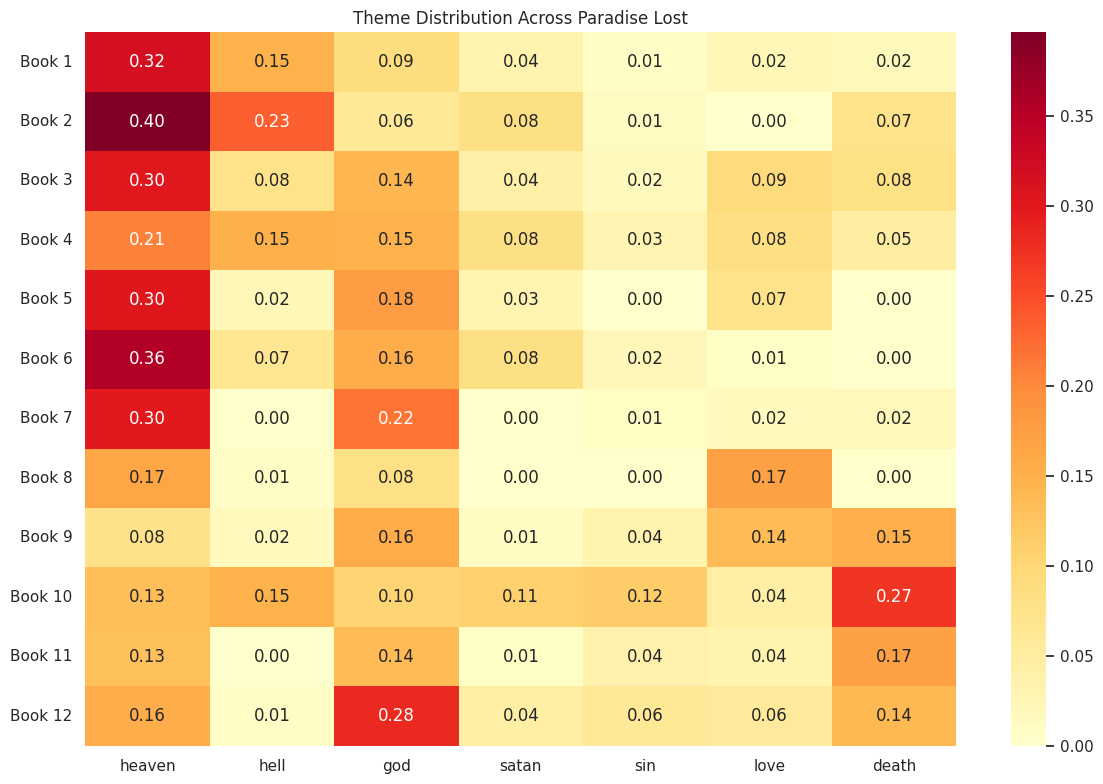

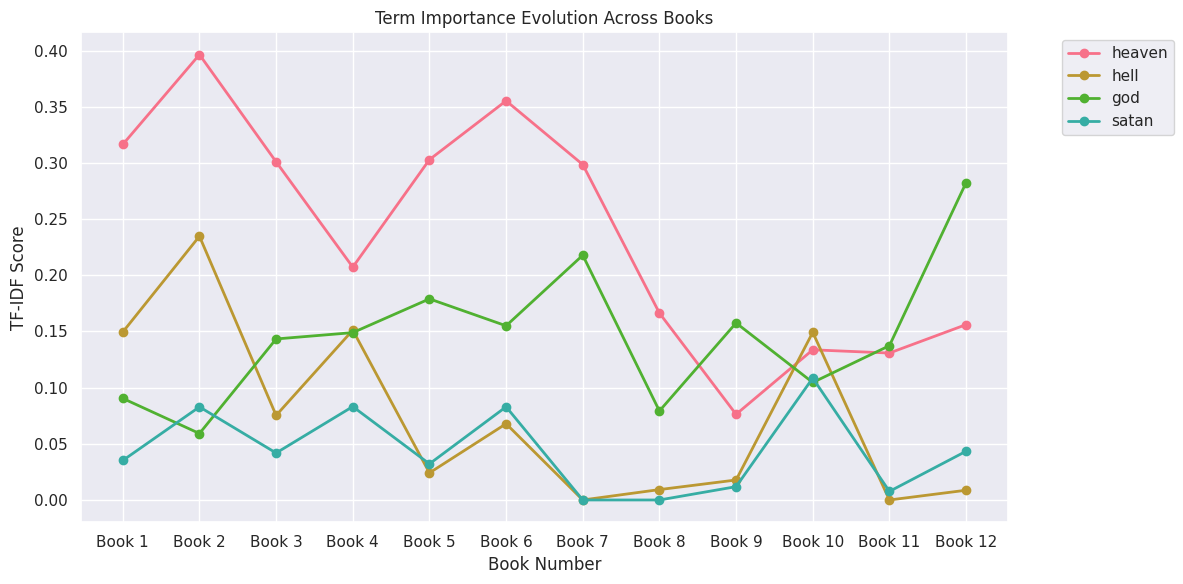

In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer

def split_into_books(text):
    """
    Split Paradise Lost into individual books using Roman numerals.
    
    Args:
        text (str): Full text of Paradise Lost
        
    Returns:
        list: Individual books as separate strings
    """
    # Remove the header material before Book I
    if '[Paradise Lost by John Milton 1667]' in text:
        text = text.split('[Paradise Lost by John Milton 1667]')[1]
    
    # Split on "Book" followed by Roman numerals
    import re
    books = re.split(r'Book [IVX]+', text)
    
    # Clean and validate each book
    books = [book.strip() for book in books if len(book.strip()) > 100]
    
    print(f"Found {len(books)} books")
    for i, book in enumerate(books, 1):
        print(f"Book {i}: {len(book)} characters")
    return books

# Rerun the splitting
books = split_into_books(text)

# Verify we have the right number of books
if len(books) == 12:
    print("\nSuccessfully split into 12 books!")
    
    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer(max_features=1000, 
                                stop_words='english',
                                lowercase=True)
    tfidf_matrix = vectorizer.fit_transform(books)
    
    tfidf_df = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns=vectorizer.get_feature_names_out(),
        index=[f'Book {i+1}' for i in range(len(books))]
    )
    
    print("\nTF-IDF matrix shape:", tfidf_df.shape)
    
    # Check a few key terms
    key_terms = ['heaven', 'hell', 'god', 'satan', 'sin', 'love', 'death']
    print("\nSample TF-IDF scores for 'satan' across first 3 books:")
    if 'satan' in tfidf_df.columns:
        print(tfidf_df['satan'].head(3))

# Visualization functions remain the same, but now should work with proper data
def plot_theme_heatmap(terms):
    plt.figure(figsize=(12, 8))
    sns.heatmap(tfidf_df[terms], 
                cmap='YlOrRd',
                xticklabels=terms,
                yticklabels=tfidf_df.index,
                annot=True,
                fmt='.2f')
    plt.title('Theme Distribution Across Paradise Lost')
    plt.tight_layout()
    plt.show()

def plot_term_evolution(terms):
    plt.figure(figsize=(12, 6))
    for term in terms:
        plt.plot(tfidf_df.index, tfidf_df[term], 
                label=term, marker='o', linewidth=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Term Importance Evolution Across Books')
    plt.xlabel('Book Number')
    plt.ylabel('TF-IDF Score')
    plt.tight_layout()
    plt.show()

# Generate visualizations
print("\nGenerating visualizations...")
plot_theme_heatmap(key_terms)
plot_term_evolution(key_terms[:4])

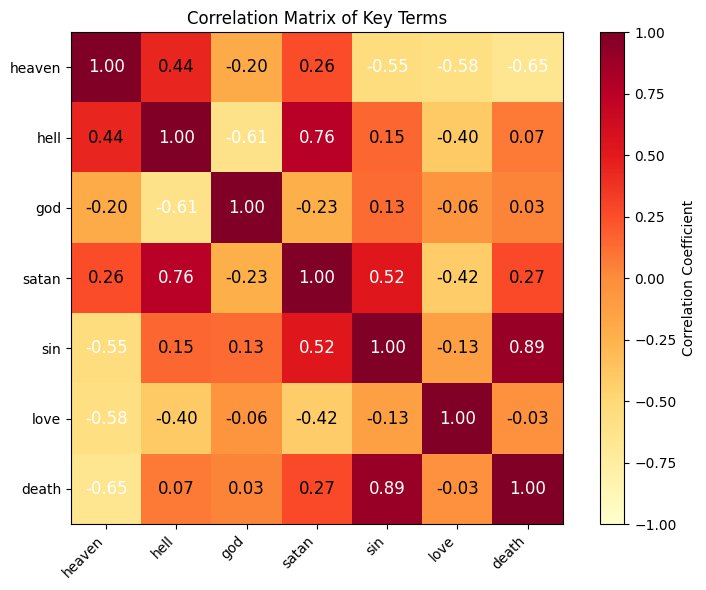

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
# Example correlation matrix
corr = np.corrcoef(tfidf_df[key_terms].T)

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap='YlOrRd', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient')

# Add labels
plt.xticks(range(len(key_terms)), key_terms, rotation=45, ha='right')
plt.yticks(range(len(key_terms)), key_terms)

# Add numbers (annotations) in each cell
for i in range(len(key_terms)):
    for j in range(len(key_terms)):
        text = plt.text(
            j, i, f"{corr[i, j]:.2f}",
            ha="center", va="center",
            color="white" if abs(corr[i, j]) > 0.5 else "black",
            fontsize=12
        )

plt.title('Correlation Matrix of Key Terms')
plt.tight_layout()
plt.show()


______

## Interpreting TF-IDF Visualizations of Paradise Lost

### What These Visualizations Show
The TF-IDF (Term Frequency-Inverse Document Frequency) visualizations reveal how Milton's language and themes evolve throughout Paradise Lost. Each score combines two factors:
- How often a term appears in a particular book (Term Frequency)
- How unique that term is to specific books versus appearing everywhere (Inverse Document Frequency)

### Reading the Heatmap
The heatmap shows the relative importance of key terms across all twelve books. Darker colors indicate higher TF-IDF scores, meaning that term is particularly important in that book. For example:
- If 'satan' shows darker colors in early books, it suggests Satan's prominence in the narrative's opening
- If 'sin' intensifies around Book 9, it reflects the crucial moment of the Fall
- Terms that appear uniformly across all books will have lighter colors (lower scores) because they're not distinctive to any particular section

### Understanding the Evolution Plot
The line plot traces how term importance changes through the narrative. Sharp peaks indicate moments where a term becomes especially significant to the story. For instance:
- Rising lines suggest increasing thematic importance
- Falling lines might indicate shifting focus
- Intersecting lines can reveal thematic transitions in the narrative

### Making Connections to the Text
These visualizations help us understand Milton's narrative structure quantitatively. When you see a term spike in importance:
1. Think about what's happening in that part of the story
2. Consider why Milton emphasizes certain themes at certain moments
3. Look for patterns that might not be obvious in a regular reading

### Questions to Consider
- Why do certain terms cluster together in specific books?
- How do the patterns align with major plot points in Paradise Lost?
- What do the relative scores between different terms tell us about Milton's priorities?
- How might these patterns reflect Milton's theological or political messages?

Remember: TF-IDF scores highlight what makes each book distinctive, not just what's mentioned frequently. A term that appears consistently throughout will have lower scores than one that's concentrated in specific important moments.

Your final task: find one fun fact about Paradise Lost that you can share with the group you are paired with.

Once you have all of this digested and summarized clearly on your whiteboard, teach it to the other group. 

____
____

![PL](https://dquigley.dev/assets/sentiment_pl/vis_data_n_gram.png)
_____

# **Even-Numbered Groups:** From Words to Networks: N-grams and Graph Analysis

Your group will explore data patterns at the word level. 

You already studied $N$-grams in the PCA, and you will explore them a bit more here. What is new is that you will think about yet another type of data: data that shows connected relationships. To show these relations we can use a formal mathematical tool called a "graph", not to be confused with a plot. Graph data can be used in many fields, notably for social science and genetics. You will learn a bit about graphs and teach this new idea to the group you are paired with. 

Let's start by reviewing $N$-grams.

### What are N-grams?
N-grams are sequences of N consecutive words in text. For example, in the phrase "Of Man's first disobedience":
- Bigrams (N=2): "Of Man's", "Man's first", "first disobedience"
- Trigrams (N=3): "Of Man's first", "Man's first disobedience"

### Why N-grams Matter
Operating at the indovidual words level, N-grams reveal:
- Common word patterns
- Phrasal structures
- Writing style
- Collocations (words that often appear together)

### In Paradise Lost
N-grams help us understand:
- Milton's characteristic phrases
- How he constructs descriptions of heaven, hell, God, and Satan
- Repeated patterns in his epic similes
- The relationship between characters through their associated word patterns



### Questions to Consider
- How do word combinations differ when describing divine vs. earthly subjects?
- What patterns appear around key characters?
- How does Milton construct his epic similes?
- What do these patterns tell us about his writing style?


You'll explore how text reveals interconnected patterns. Graphs are mathematical structures that show relationships between objects, appearing across many fields:

### Examples of Graph Analysis
1. **Social Networks**
  - Nodes: People
  - Edges: Friendships/connections
  - Reveals: Community structures, influencers

2. **Biological Networks**
  - Nodes: Genes/proteins
  - Edges: Interactions/regulations
  - Reveals: Disease pathways, drug targets

3. **Transportation**
  - Nodes: Cities/airports
  - Edges: Routes
  - Reveals: Hub cities, efficient paths

4. **Web Pages**
  - Nodes: Websites
  - Edges: Links
  - Reveals: Important pages, information flow

### N-grams as Networks
In text, we create graphs where:
- Nodes: Words
- Edges: Words appearing together
- Edge weights: Frequency of co-occurrence

Example from Paradise Lost:
```python
# Bigram graph
"Of Man's first disobedience" creates:
Of → Man's → first → disobedience

# Edge weights
If "heaven's gate" appears 5 times:
heaven's -- (weight=5) --> gate

Run the code below and explore its output.



In [ ]:
# Required imports
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk import ngrams
import networkx as nx

# Set visualization style
sns.set_theme()
sns.set_palette("husl")

# Download required NLTK data
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('gutenberg')
except:
    print("Some NLTK downloads failed. Check your internet connection.")

# Load Paradise Lost
from nltk.corpus import gutenberg
text = gutenberg.raw('milton-paradise.txt')

def preprocess_text(text):
    """Clean and tokenize text"""
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and len(token) > 1 
             and token not in stop_words]
    return tokens

def get_significant_ngrams(tokens, n, min_freq=5):
    """
    Get significant n-grams and their frequencies.
    Now takes tokens instead of raw text.
    """
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))
    
    # Count frequencies
    freq_dist = Counter(n_grams)
    
    # Filter by frequency
    significant = {ng: freq for ng, freq in freq_dist.items() 
                  if freq >= min_freq}
    
    return significant

def create_network_visualization(bigrams, min_freq=10, max_edges=50):
    """Create and return network graph"""
    # Create graph
    G = nx.Graph()
    
    # Add edges with weights
    for (w1, w2), freq in bigrams.items():
        if freq >= min_freq:
            G.add_edge(w1, w2, weight=freq)
    
    # Limit to most significant connections
    if len(G.edges()) > max_edges:
        significant_edges = sorted(G.edges(data=True), 
                                 key=lambda x: x[2]['weight'], 
                                 reverse=True)[:max_edges]
        G = nx.Graph()
        for w1, w2, data in significant_edges:
            G.add_edge(w1, w2, weight=data['weight'])
    
    return G

def plot_word_network(G):
    """Plot word network"""
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=2, iterations=50)
    edge_weights = [G[u][v]['weight']/5 for u,v in G.edges()]
    
    nx.draw(G, pos,
            node_color='lightblue',
            node_size=2000,
            font_size=10,
            font_weight='bold',
            width=edge_weights,
            with_labels=True,
            edge_color='gray',
            alpha=0.7)
    plt.title("Word Connections in Paradise Lost")
    plt.tight_layout()
    plt.show()

def plot_character_contexts(tokens, characters=['satan', 'adam', 'eve', 'god']):
    """Analyze contexts around character names"""
    # Get windows around character mentions
    windows = {}
    
    for char in characters:
        char_indices = [i for i, t in enumerate(tokens) if t == char]
        context_words = []
        for idx in char_indices:
            start = max(0, idx - 2)
            end = min(len(tokens), idx + 3)
            context_words.extend(tokens[start:end])
        windows[char] = Counter(context_words)
    
    # Visualize character contexts
    plt.figure(figsize=(15, 8))
    for char, contexts in windows.items():
        common_words = dict(contexts.most_common(10))
        plt.bar([f"{char}_{k}" for k in common_words.keys()], 
                common_words.values(), 
                alpha=0.5, 
                label=char)
    
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.title('Words Associated with Major Characters')
    plt.tight_layout()
    plt.show()

# Main analysis
print("Processing text...")
tokens = preprocess_text(text)

print("Generating n-grams...")
bigrams = get_significant_ngrams(tokens, 2, min_freq=10)
trigrams = get_significant_ngrams(tokens, 3, min_freq=5)

print("Creating network...")
G = create_network_visualization(bigrams)

print("Generating visualizations...")
plot_word_network(G)
plot_character_contexts(tokens)

# Print some statistics
print("\nMost common bigrams:")
for bigram, freq in sorted(bigrams.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{bigram}: {freq}")

### Reading the Visualizations
1. Network Graph:
   - Nodes are individual words
   - Connections show which words appear together in text
   - Thicker lines indicate more frequent co-occurrence
   - Clusters reveal related word groups

2. Character Context Plot:
   - Shows words appearing within 2 words before/after character names
   - Format: "character_contextword" shows frequency of "contextword" near "character"
   - Higher bars indicate words more commonly found near that character
   - Reveals patterns in how characters are described or act

Your final task: find one fun fact about Paradise Lost that you can share with the group you are paired with.

Once you have all of this digested and summarized clearly on your whiteboard, teach it to the other group. 